In [1]:
import tomopy
import math
import dxchange
import os
import matplotlib.pyplot as plt
import numpy as np

astropy module not found
olefile module not found


In [2]:
def get_ind_list(name_list:list):
    ind = []
    ang_deg = []
    ang_rad = []
    ind_dict_random = {}
    ind_dict_sorted = {}
    for e_name in name_list:
        _split = e_name.split('_')
        _index_tiff = _split[-1]
        _index = _index_tiff.split('.')[0]
        _ang = _split[-3] + '.' + _split[-2]
        index = int(_index)
        angle = float(_ang)
        ind.append(index)
        ang_deg.append(angle)
        ang_rad.append(math.radians(angle))
        ind_dict_random[index] = e_name
    ind = sorted(ind)
    for n, e_ind in enumerate(ind):
        ind_dict_sorted[n] = ind_dict_random[e_ind]
    
    return list(ind_dict_sorted.values()), np.array(sorted(ang_deg)), np.array(sorted(ang_rad)), ind

def get_list(name_list:list):
    ind = []
    ind_dict_random = {}
    ind_dict_sorted = {}
    for e_name in name_list:
        _split = e_name.split('_')
        _index_tiff = _split[-1]
        _index = _index_tiff.split('.')[0]
        index = int(_index)
        ind.append(index)
        ind_dict_random[index] = e_name
    ind = sorted(ind)
    for n, e_ind in enumerate(ind):
        ind_dict_sorted[n] = ind_dict_random[e_ind]
    
    return list(ind_dict_sorted.values()), ind

def _init_arr_from_stack(fname, number_of_files, slc=None):
    """
    Initialize numpy array from files in a folder.
    """
    _arr = dxchange.read_tiff(fname, slc)
    size = (number_of_files, _arr.shape[0], _arr.shape[1])
    return np.empty(size, dtype=_arr.dtype)

def read_tiff_stack(fdir, fname:list):
    arr = _init_arr_from_stack(os.path.join(fdir, fname[0]), len(fname))
    for m, name in enumerate(fname):
        arr[m] = dxchange.read_tiff(os.path.join(fdir, name))
    return arr

In [3]:
###################### need to change start
ipts="23788"
###################### need to change end

In [4]:
ct_scan_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/ct_scans"
os.listdir(ct_scan_loc)

['2021_08_17_HEA',
 'Nov16_2019',
 'Aug20_2020',
 '2021_04_22',
 'Nov14_2019',
 'Oct30_2019',
 'Oct29_2019',
 'Nov17_2019',
 'Aug24_2020',
 '2021_08_14_plastic_2nd_resume',
 'June29_2020',
 'Aug19_2020',
 '2021_08_14_plastic_2nd',
 'July01_2020',
 '2021_09_03_gold_ore_wim',
 '2021_08_11_plastic',
 'Feb10_2020']

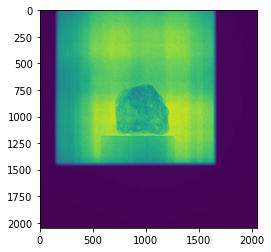

(1290, 2048, 2048)


In [5]:
###################### need to change start
ct_scan_dir = os.path.join(ct_scan_loc, "Aug24_2020")
###################### need to change end
# os.listdir(ct_scan_dir)
ct_name, ang_deg, theta, ind_list = get_ind_list(os.listdir(ct_scan_dir))
proj = read_tiff_stack(fdir=ct_scan_dir, fname=ct_name)
plt.imshow(proj[0])
plt.show()
print(proj.shape)

# Open Beam (OB)

In [6]:
ob_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/ob"
os.listdir(ob_loc)

['2021_08_19_shale',
 'Nov15_2019',
 'Dec19_2019',
 '2021_08_17_HEA',
 'Dec18_2019',
 'Aug20_2020',
 '2021_04_22',
 'Nov14_2019',
 '2021_03_25',
 'Oct30_2019',
 'Oct29_2019',
 'Nov17_2019',
 'Aug24_2020',
 'December26_2019',
 'June29_2020',
 '2021_09_02_coin_cell_Maha',
 '2021_08_14_zyla_1x_OB_11mm',
 '2021_08_14_zyla_1x_OB_16mm',
 'Aug19_2020',
 'July01_2020',
 '2021_09_03_gold_ore_wim',
 '2021_08_11_plastic',
 'June27_2020',
 '2021_03_25_plastic',
 'Feb10_2020']

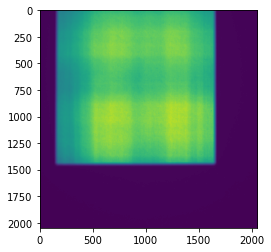

(10, 2048, 2048)


In [7]:
###################### need to change start
ob_dir = os.path.join(ob_loc, "Aug24_2020")
###################### need to change end
# os.listdir(ob_dir)
ob_name, ob_ind_list = get_list(os.listdir(ob_dir))
ob = read_tiff_stack(fdir=ob_dir, fname=ob_name)
plt.imshow(ob[0])
plt.show()
print(ob.shape)

# Dark Current (DC)

In [8]:
dc_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/df"
os.listdir(dc_loc)

['2021_08_19_shale',
 'Aug21_2020',
 'Dec19_2019',
 '2021_05_10_shutter_open',
 'Feb06_2020',
 'Oct29_2019',
 '2021_08_16_DF_high_res',
 '2021_08_19_zyla',
 'Aug24_2020',
 'December26_2019',
 'June29_2020',
 '2021_09_05',
 'Aug25_2020',
 '2021_08_27_DF_30s',
 'Nov12_2019',
 'July01_2020',
 'June27_2020',
 'July02_2020',
 'Feb11_2020',
 'Nov18_2019']

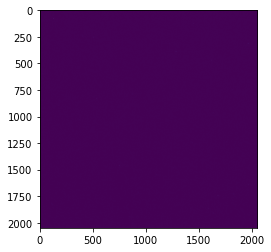

(10, 2048, 2048)


In [9]:
###################### need to change start
dc_dir = os.path.join(dc_loc, "Aug24_2020")
###################### need to change end
# os.listdir(dc_dir)
dc_name, dc_ind_list = get_list(os.listdir(dc_dir))
dc = read_tiff_stack(fdir=dc_dir, fname=dc_name)
plt.imshow(dc[0])
plt.show()
print(dc.shape)

# Cropping and Select ROI

In [12]:
slit_box_corners = tomopy.prep.alignment.find_slits_corners_aps_1id(img=ob[0], method='simple')
proj = tomopy.prep.alignment.remove_slits_aps_1id(proj, slit_box_corners)
ob = tomopy.prep.alignment.remove_slits_aps_1id(ob, slit_box_corners)
dc = tomopy.prep.alignment.remove_slits_aps_1id(dc, slit_box_corners)

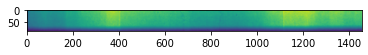

In [13]:
plt.imshow(proj[0])
plt.show()

# Remove Outliers

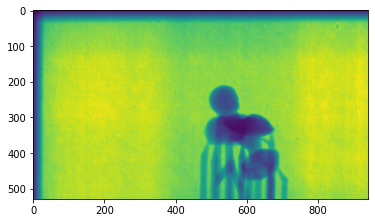

In [17]:
proj_c = tomopy.misc.corr.remove_outlier(proj, 50)
plt.imshow(proj_c[0])
plt.show()

# Normalization

In [13]:
proj = tomopy.normalize(proj, ob, dc)

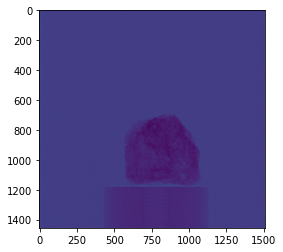

In [14]:
plt.imshow(proj[0])
plt.show()

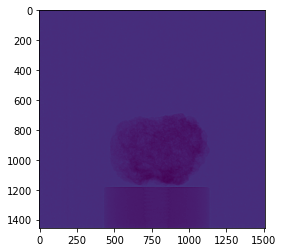

In [15]:
plt.imshow(proj[200])
plt.show()

In [16]:
# proj_n = tomopy.prep.normalize.normalize_bg(proj)

# COR

In [17]:
proj_m = tomopy.minus_log(proj)

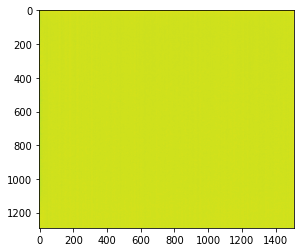

In [18]:
plt.imshow(proj_m[:,0,:])
plt.show()

In [19]:
rot_center = tomopy.find_center_vo(proj_m)
print("Center of rotation: ", rot_center)

Center of rotation:  811.0


# Reconstruction

In [20]:
recon = tomopy.recon(proj_m, theta, center=rot_center, algorithm='gridrec', sinogram_order=False)

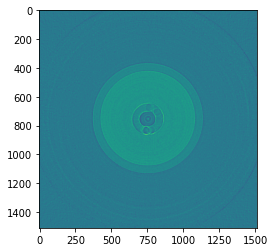

In [24]:
plt.imshow(recon[1400, :, :])
plt.show()